In [7]:
from src import unpickle 
from src import TrainModels
from importlib import reload
from sklearn import tree as t
import numpy as np
import src.game as g
from src import unpickle
%pwd

'/Users/elliottsaslow/Personality_Test_Project/website/Model'

In [1]:
long_key, questions, grading_Key,\
keys2trait, Trait_dict_keys, Trait_dict_questions,\
graded_df, percentile_df, traits_df= unpickle.Load_pickled_files('data/Model_checkpoint')

NameError: name 'unpickle' is not defined

Load in previous data and then calculate percentile df

In [10]:
reload(TrainModels)
print("How many questions would you like (max) per trait")
max_depth = -1
while (max_depth < 0) or (max_depth > 15):
    max_depth = input('Enter a integer between 2 and 15: ')
    max_depth = int(max_depth)


print('\n','-'*50,'\n')


print('\n\nTraining Models!')
Traits,models = TrainModels.Train_models(traits_df,questions,max_depth)
print('\nModels are trained!')

How many questions would you like (max) per trait
Enter a integer between 2 and 15: 4

 -------------------------------------------------- 



Training Models!

Model:  Openness

Done Training Model 1
--Remaining:  4 --
Mean abs error: 14.93% 
 --------------------------------------------------

Model:  Conscientiousness

Done Training Model 2
--Remaining:  3 --
Mean abs error: 12.96% 
 --------------------------------------------------

Model:  Extraversion

Done Training Model 3
--Remaining:  2 --
Mean abs error: 12.48% 
 --------------------------------------------------

Model:  Agreeableness

Done Training Model 4
--Remaining:  1 --
Mean abs error: 14.37% 
 --------------------------------------------------

Model:  Neuroticism

Done Training Model 5
--Remaining:  0 --
Mean abs error: 12.12% 
 --------------------------------------------------

Models are trained!


In [11]:
quiz = g.Quiz()
for i,model in enumerate(models):
    tree = model.tree_
    print(Traits[i])

    if i == 0:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i])
    else:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i],(True,df))
    print(Traits[i])
    print('\n\n')

Openness
Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 


Do not like art. 2
Have difficulty imagining things. 2
Am not interested in theoretical discussions. 1
Do not like poetry. 2

You fall in the 39.179% percentile of this trait which correponds to node: 8
Openness



Conscientiousness
Have difficulty starting tasks. 1
Put little time and effort into my work. 2
Carry out my plans. 1
Leave a mess in my room. 2

You fall in the 46.968% percentile of this trait which correponds to node: 20
Conscientiousness



Extraversion
Talk to a lot of different people at parties. 1
Keep in the background. 2
Feel comfortable around people. 3
Love action. 1

You fall in the 22.944% percentile of this trait which correponds to node: 11
Extraversion



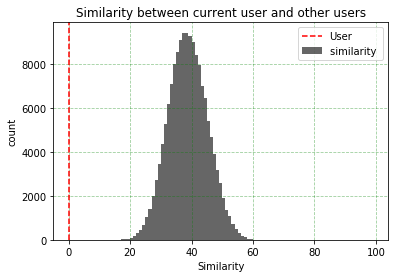

In [12]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse
import numpy as np
from numpy.random import rand
import random

from collections import Counter
import matplotlib.pyplot as plt

### Recommender System
#Get the Users ratings
uservals = quiz.df.loc[0,:]

#Look at what others answered to the same questions
everyone = questions[quiz.df.columns[uservals.nonzero()]]

#Find the difference between others and current user
everyone_abs = np.abs(everyone - uservals[quiz.df.columns[uservals.nonzero()]])

#sort the values based on the sum
ind = everyone_abs.sum(axis = 1).sort_values()[:10].index

#take the mean of the closest 10 users
percentile_df_user = percentile_df.loc[ind,:].mean(axis = 0)

plt.hist(everyone_abs.sum(axis = 1),
         bins = range(0,100),
         label = 'similarity ',
         color = 'k',
         alpha = .6)
plt.title('Similarity between current user and other users')
plt.ylabel('count')
plt.xlabel('Similarity')
plt.grid(alpha = .4,c= 'g',ls = '--')
plt.axvline(0,label = 'User',c = 'r',ls = '--')
plt.legend()
plt.show()

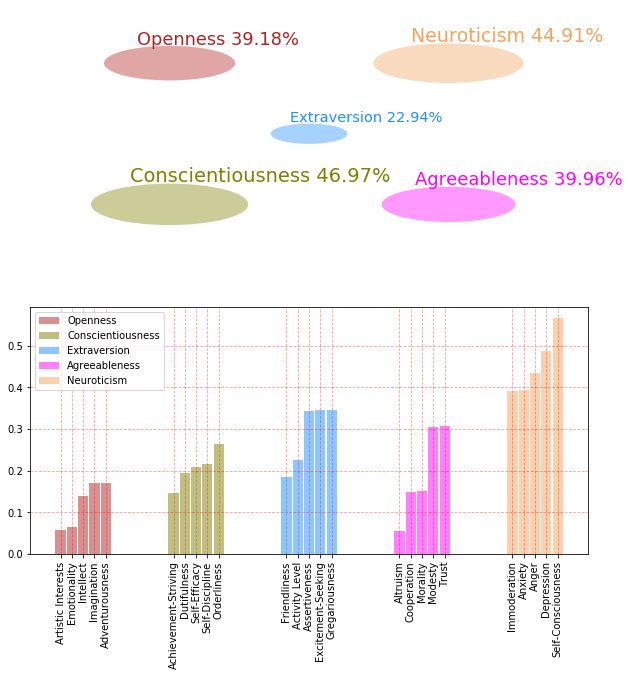

In [13]:
import src.plot_traits as pt
reload(pt)
trait_scores = np.array(quiz.Trait_score)/100

ax = pt.plot(trait_scores,percentile_df_user,keys2trait)
ax[0].axis('off');